<a href="https://colab.research.google.com/github/adamstiefel/LLM-Support-Ticket-Categorization/blob/main/NLP_Project_Learner_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**

### **Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to **swiftly and effectively respond to customer input** not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**


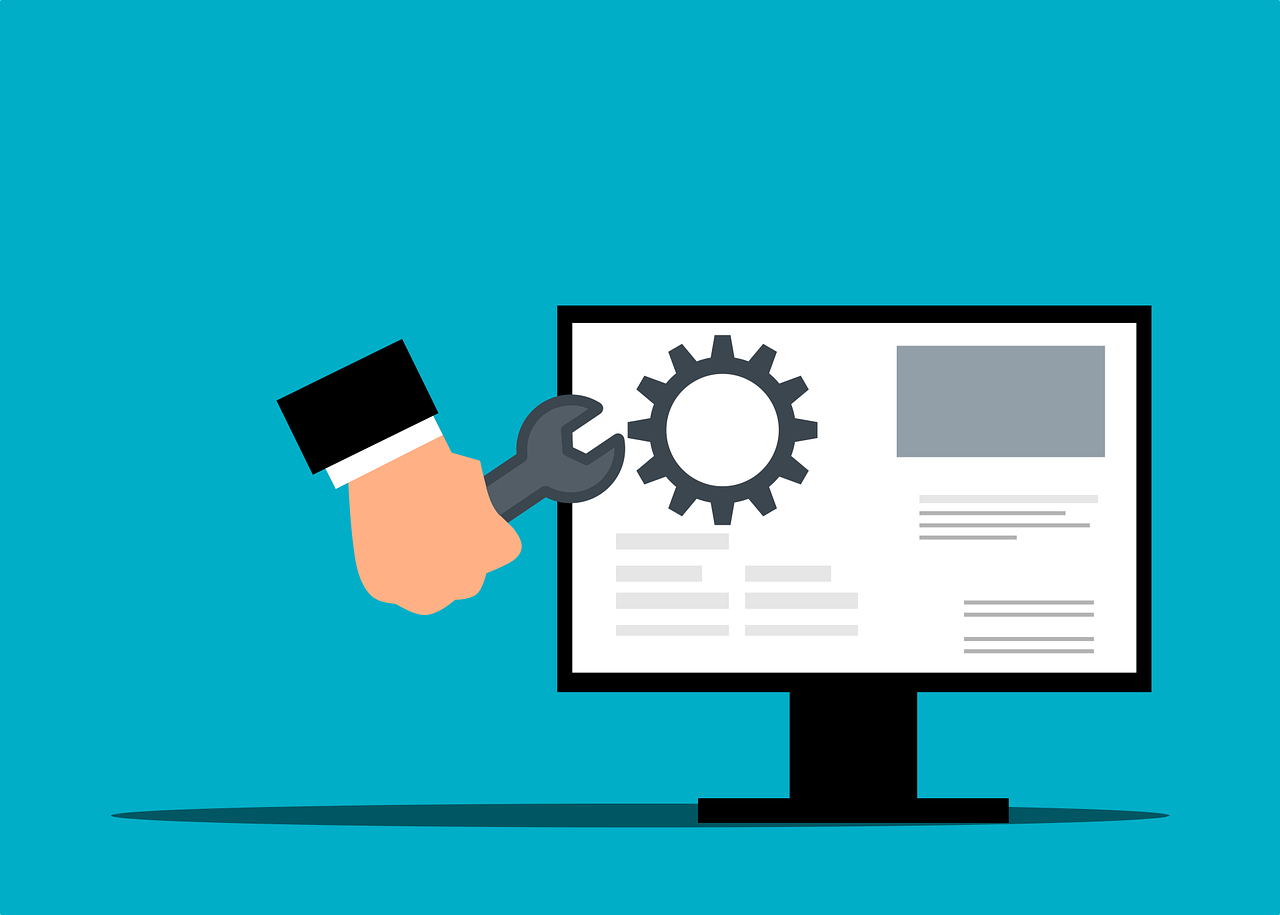

### **Objective**

Develop a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.


## **Sample of Expected Output**

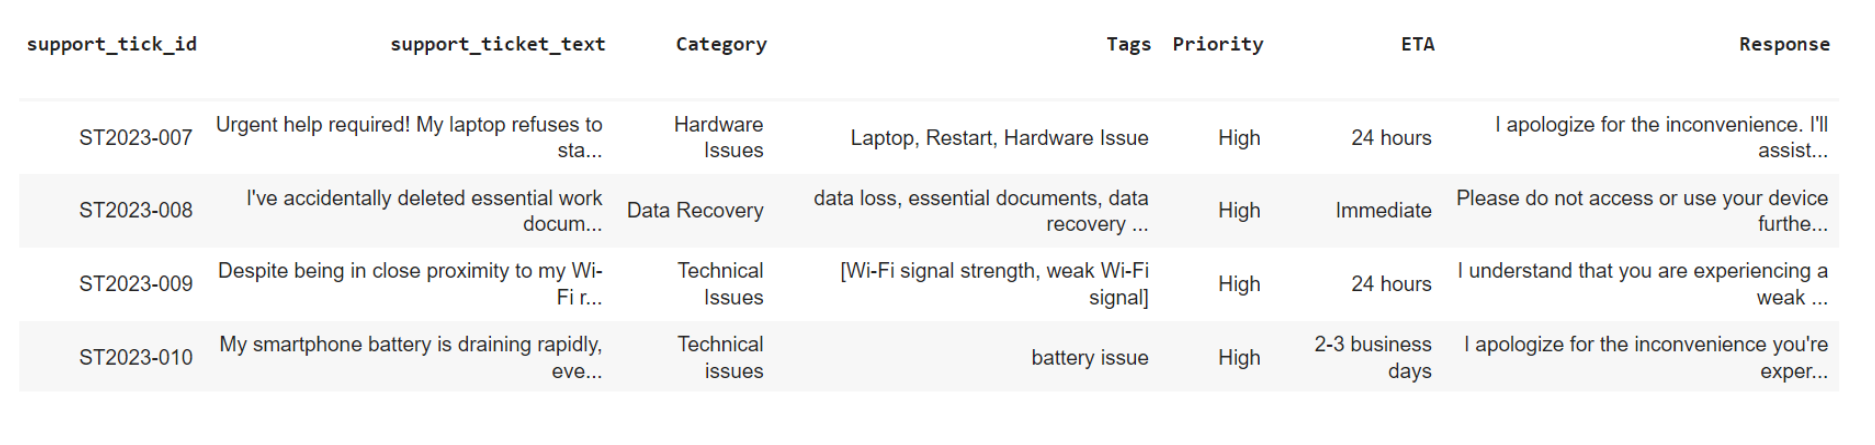

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.


## **Installing and Importing Necessary Libraries and Dependencies**

In [1]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 2.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not i

In [2]:
# Install the hugging face hub
!pip install huggingface_hub -q

In [3]:
# Importing library for data manipulation
import pandas as pd

# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

## **Loading the Dataset**

In [4]:
# Not loading from drive but from files so no need to mount drive
#from google.colab import drive
#drive.mount('/content/Support_ticket_text_data_mid_term.csv')

In [5]:
# Code to read the CSV file
data = pd.read_csv("/content/Support_ticket_text_data_mid_term.csv")

## **Data Overview**

In [6]:
# Code to check the first 5 rows of the data
data.head()

support_tick_id                                support_ticket_text
0      ST2023-006  My internet connection has significantly slowe...
1      ST2023-007  Urgent help required! My laptop refuses to sta...
2      ST2023-008  I've accidentally deleted essential work docum...
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...
4      ST2023-010  My smartphone battery is draining rapidly, eve...

In [7]:
# Check the shape of the data
shape = data.shape

print("Shape of the DataFrame:")
print("Rows:", shape[0], ", Columns:", shape[1])

Shape of the DataFrame:
Rows: 21 , Columns: 2


In [8]:
# Code to check for missing values in the data
missing_values = data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
support_tick_id        0
support_ticket_text    0
dtype: int64


## **Model Building**

### Loading the model

In [9]:
# Define model
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [10]:
# Using hf_hub_download to download a model from the Hugging Face model hub
# The repo_id parameter specifies the model name or path in the Hugging Face repository
# The filename parameter specifies the name of the file to download
model_path = hf_hub_download(
    repo_id = model_name_or_path,    # Code to mention the repo_id
    filename = model_basename    # Code to mention the filename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

In [11]:
# Code to create an instance of the 'Llama' class with specified parameters

lcpp_llm = Llama(
    model_path= model_path,
    n_threads=2,  # CPU cores
    n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
    n_ctx=4096,  # Context window
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

### Defining Model Response Parameters

In [12]:
def generate_llama_response(instruction, review):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]<<SYS>>
        {}
        <</SYS>>[/INST]
    """.format(instruction)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{review}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,
        temperature=0.01,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

## **Task 1: Ticket Categorization**

In [84]:
# create a copy of the data
data_1 = data.copy()

In [85]:
## Prompt to get the desired output
instruction_1 = """
    Predict ticket category as Technical issues, Hardware issues, or Data recovery.

  The output should be in the form of:
  1. the Category
"""

In [86]:
data_1['llama_response'] = data_1['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_1,x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =       5.08 ms /     7 runs   (    0.73 ms per token,  1377.14 tokens per second)
llama_print_timings: prompt eval time =     448.94 ms /   111 tokens (    4.04 ms per token,   247.25 tokens per second)
llama_print_timings:        eval time =     334.94 ms /     6 runs   (   55.82 ms per token,    17.91 tokens per second)
llama_print_timings:       total time =     818.61 ms /   117 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =       5.62 ms /     7 runs   (    0.80 ms per token,  1244.44 tokens per second)
llama_print_timings: prompt eval time =     424.61 ms /   110 tokens (    3.86 ms per token,   259.06 tokens per second)
llama_print_timings:        eval time =     328.27 ms /     6 runs   (   54.71 ms per token,    18.28 tokens per second)
llama_print_timings:       to

In [87]:
# Code to check the first five rows of the data to confirm whether the new column has been added
data_1.head()



support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  
0                                1. Technical Issues  
1                                 1. Hardware Issues  
2                                   1. Data Recovery  
3                                1. Technical Issues  
4  1. Category: Hardware Issues\n\nBased on your ...

In [88]:
def extract_category(model_response):
    if 'technical issues' in model_response.lower():
        return 'Technical issues'
    elif 'hardware issues' in model_response.lower():
        return 'Hardware issues'
    elif 'data recovery' in model_response.lower():
        return 'Data recovery'

In [89]:
data_1['Category'] = data_1['llama_response'].apply(extract_category)
data_1['Category'].head()

0    Technical issues
1     Hardware issues
2       Data recovery
3    Technical issues
4     Hardware issues
Name: Category, dtype: object

In [90]:
#data_1.reset_index
#i =2
#print(data_1.loc[i, 'review_full'])

i =0
print(data_1.loc[i, 'llama_response'])

1. Technical Issues


In [91]:
final_data_1 = data_1.drop(['llama_response'], axis=1)
final_data_1.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

           Category  
0  Technical issues  
1   Hardware issues  
2     Data recovery  
3  Technical issues  
4   Hardware issues

In [92]:
# Existing code to categorize tickets
data_1['Category'] = data_1['llama_response'].apply(extract_category)

# Analyze category distribution
category_counts = data_1['Category'].value_counts()
print(category_counts)


Technical issues    9
Data recovery       7
Hardware issues     5
Name: Category, dtype: int64


## **Task 2: Ticket Categorization and Returning Structured Output**

In [22]:
# create a copy of the data
data_2 = data.copy()

In [23]:
## Complete the prompt to get the desired output
instruction_2 = """
   Predict ticket category as Technical issues, Hardware issues, or Data recovery.

  The output should be in the form of a JSON with:
  1. the Category
"""

In [24]:
data_2['llama_response'] = data_2['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_2,x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =      11.05 ms /    17 runs   (    0.65 ms per token,  1537.90 tokens per second)
llama_print_timings: prompt eval time =     430.79 ms /   114 tokens (    3.78 ms per token,   264.63 tokens per second)
llama_print_timings:        eval time =     982.67 ms /    16 runs   (   61.42 ms per token,    16.28 tokens per second)
llama_print_timings:       total time =    1474.67 ms /   130 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =      10.43 ms /    17 runs   (    0.61 ms per token,  1629.76 tokens per second)
llama_print_timings: prompt eval time =     452.22 ms /   113 tokens (    4.00 ms per token,   249.88 tokens per second)
llama_print_timings:        eval time =     943.06 ms /    16 runs   (   58.94 ms per token,    16.97 tokens per second)
llama_print_timings:       to

In [25]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_2.head

print(data_2.head())

  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  
0   {\n       "Category": "Technical Issues"\n     }  
1    {\n       "Category": "Hardware Issues"\n     }  
2      {\n       "Category": "Data Recovery"\n     }  
3   {\n       "Category": "Technical Issues"\n     }  
4   Sure! Based on the information provided, I wo...  


In [26]:
# defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [27]:
data_2['llama_response_parsed'] = data_2['llama_response'].apply(extract_json_data)
data_2['llama_response_parsed'].head()

0    {'Category': 'Technical Issues'}
1     {'Category': 'Hardware Issues'}
2       {'Category': 'Data Recovery'}
3    {'Category': 'Technical Issues'}
4     {'Category': 'Hardware Issues'}
Name: llama_response_parsed, dtype: object

In [28]:
llama_response_parsed_df_2 = pd.json_normalize(data_2['llama_response_parsed'])
llama_response_parsed_df_2.head()

Category
0  Technical Issues
1   Hardware Issues
2     Data Recovery
3  Technical Issues
4   Hardware Issues

In [29]:
data_with_parsed_model_output_2 = pd.concat([data_2, llama_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   {\n       "Category": "Technical Issues"\n     }   
1    {\n       "Category": "Hardware Issues"\n     }   
2      {\n       "Category": "Data Recovery"\n     }   
3   {\n       "Category": "Technical Issues"\n     }   
4   Sure! Based on the information provided, I wo...   

              llama_response_parsed          Category  
0  {'Category': 'Technical Issues'}  Technical Issues  
1   {'Category': 'Hardware Issues'}   Hardware Issues  
2     {'Category': 'Data Recovery'}     Data Recovery  
3  {'Category': 'Technical Issues'}  Technical Issues  
4   {'Category': 'Hardware Issues'}   Hardware Issues

In [30]:
final_data_2 = data_with_parsed_model_output_2.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_2.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

           Category  
0  Technical Issues  
1   Hardware Issues  
2     Data Recovery  
3  Technical Issues  
4   Hardware Issues

In [31]:
final_data_2

support_tick_id                                support_ticket_text  \
0       ST2023-006  My internet connection has significantly slowe...   
1       ST2023-007  Urgent help required! My laptop refuses to sta...   
2       ST2023-008  I've accidentally deleted essential work docum...   
3       ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4       ST2023-010  My smartphone battery is draining rapidly, eve...   
5       ST2023-011  I'm locked out of my online banking account an...   
6       ST2023-012  My computer's performance is sluggish, severel...   
7       ST2023-013  I'm experiencing a recurring blue screen error...   
8       ST2023-014  My external hard drive isn't being recognized ...   
9       ST2023-015  The graphics card in my gaming laptop seems to...   
10      ST2023-016  I accidentally formatted my USB drive with cri...   
11      ST2023-017  My computer's screen has gone black, and I can...   
12      ST2023-018  I accidentally spilled water on my laptop, and...   
13      ST2023-019  My USB flash drive is physically damaged, and ...   
14      ST2023-020  The touchpad on my laptop has stopped working,...   
15      ST2023-021  My internet connection is frequently dropping,...   
16      ST2023-022  Wi-Fi is inconsistent despite proximity to the...   
17      ST2023-023  I accidentally formatted my USB drive with cru...   
18      ST2023-024  My external hard drive isn't being recognized,...   
19      ST2023-025  I am experiencing a critical problem with my i...   
20      ST2023-026  I hope this message finds you well. I am writi...   

            Category  
0   Technical Issues  
1    Hardware Issues  
2      Data Recovery  
3   Technical Issues  
4    Hardware Issues  
5      Data Recovery  
6    Hardware Issues  
7    Hardware Issues  
8      Data Recovery  
9    Hardware Issues  
10     Data Recovery  
11   Hardware Issues  
12   Hardware Issues  
13     Data Recovery  
14   Hardware Issues  
15  Technical Issues  
16  Technical Issues  
17     Data Recovery  
18     Data Recovery  
19  Technical Issues  
20     Data Recovery

## **Task 3: Ticket Categorization, Creating Tags, and Returning Structured Output**

In [32]:
# create a copy of the data
data_3 = data.copy()

In [33]:
## Complete the prompt to get the desired output
instruction_3 = """
    You are an AI analyzing support tickets. Categorize the provided support ticket into one of the following categories:
    - "Technical issues"
    - "Hardware issues"
    - "Data recovery"

    Once that is done, add relevant tags to the support ticket.

    The output should be in the form of a JSON with:
  1. the Category
  2. the Tags
"""

In [34]:
data_3['llama_response'] = data_3['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_3,x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =      35.56 ms /    48 runs   (    0.74 ms per token,  1349.87 tokens per second)
llama_print_timings: prompt eval time =     544.22 ms /   169 tokens (    3.22 ms per token,   310.54 tokens per second)
llama_print_timings:        eval time =    2720.04 ms /    47 runs   (   57.87 ms per token,    17.28 tokens per second)
llama_print_timings:       total time =    3512.73 ms /   216 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =      37.63 ms /    60 runs   (    0.63 ms per token,  1594.51 tokens per second)
llama_print_timings: prompt eval time =     553.19 ms /   168 tokens (    3.29 ms per token,   303.69 tokens per second)
llama_print_timings:        eval time =    3406.09 ms /    59 runs   (   57.73 ms per token,    17.32 tokens per second)
llama_print_timings:       to

In [93]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_3.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   Sure! Here is the support ticket categorized ...   
1   Sure, I can assist you with that! Based on th...   
2   Sure! Based on the information provided in th...   
3   Sure! Here is the support ticket categorized ...   
4   Sure! Based on the information provided in th...   

                               llama_response_parsed  
0  {'Category': 'Technical issues', 'Tags': ['int...  
1  {'Category': 'Hardware issues', 'Tags': ['lapt...  
2  {'Category': 'Data Recovery', 'Tags': ['Data L...  
3  {'Category': 'Technical issues', 'Tags': ['Wi-...  
4  {'Category': 'Hardware issues', 'Tags': ['batt...

In [36]:
data_3['llama_response_parsed'] = data_3['llama_response'].apply(extract_json_data)
data_3['llama_response_parsed'].head()

0    {'Category': 'Technical issues', 'Tags': ['int...
1    {'Category': 'Hardware issues', 'Tags': ['lapt...
2    {'Category': 'Data Recovery', 'Tags': ['Data L...
3    {'Category': 'Technical issues', 'Tags': ['Wi-...
4    {'Category': 'Hardware issues', 'Tags': ['batt...
Name: llama_response_parsed, dtype: object

In [37]:
llama_response_parsed_df_3 = pd.json_normalize(data_3['llama_response_parsed'])
llama_response_parsed_df_3.head()

Category                                               Tags
0  Technical issues  [internet connection, slow speeds, disconnecti...
1   Hardware issues            [laptop, startup, presentation, urgent]
2     Data Recovery  [Data Loss, Essential Documents, Accidental De...
3  Technical issues         [Wi-Fi, signal strength, persistent issue]
4   Hardware issues            [battery, smartphone, rapidly draining]

In [38]:
data_with_parsed_model_output_3 = pd.concat([data_3, llama_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   Sure! Here is the support ticket categorized ...   
1   Sure, I can assist you with that! Based on th...   
2   Sure! Based on the information provided in th...   
3   Sure! Here is the support ticket categorized ...   
4   Sure! Based on the information provided in th...   

                               llama_response_parsed          Category  \
0  {'Category': 'Technical issues', 'Tags': ['int...  Technical issues   
1  {'Category': 'Hardware issues', 'Tags': ['lapt...   Hardware issues   
2  {'Category': 'Data Recovery', 'Tags': ['Data L...     Data Recovery   
3  {'Category': 'Technical issues', 'Tags': ['Wi-...  Technical issues   
4  {'Category': 'Hardware issues', 'Tags': ['batt...   Hardware issues   

                                                Tags  
0  [internet connection, slow speeds, disconnecti...  
1            [laptop, startup, presentation, urgent]  
2  [Data Loss, Essential Documents, Accidental De...  
3         [Wi-Fi, signal strength, persistent issue]  
4            [battery, smartphone, rapidly draining]

In [39]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_3 = data_with_parsed_model_output_3.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_3.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

           Category                                               Tags  
0  Technical issues  [internet connection, slow speeds, disconnecti...  
1   Hardware issues            [laptop, startup, presentation, urgent]  
2     Data Recovery  [Data Loss, Essential Documents, Accidental De...  
3  Technical issues         [Wi-Fi, signal strength, persistent issue]  
4   Hardware issues            [battery, smartphone, rapidly draining]

In [94]:
final_data_3

support_tick_id                                support_ticket_text  \
0       ST2023-006  My internet connection has significantly slowe...   
1       ST2023-007  Urgent help required! My laptop refuses to sta...   
2       ST2023-008  I've accidentally deleted essential work docum...   
3       ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4       ST2023-010  My smartphone battery is draining rapidly, eve...   
5       ST2023-011  I'm locked out of my online banking account an...   
6       ST2023-012  My computer's performance is sluggish, severel...   
7       ST2023-013  I'm experiencing a recurring blue screen error...   
8       ST2023-014  My external hard drive isn't being recognized ...   
9       ST2023-015  The graphics card in my gaming laptop seems to...   
10      ST2023-016  I accidentally formatted my USB drive with cri...   
11      ST2023-017  My computer's screen has gone black, and I can...   
12      ST2023-018  I accidentally spilled water on my laptop, and...   
13      ST2023-019  My USB flash drive is physically damaged, and ...   
14      ST2023-020  The touchpad on my laptop has stopped working,...   
15      ST2023-021  My internet connection is frequently dropping,...   
16      ST2023-022  Wi-Fi is inconsistent despite proximity to the...   
17      ST2023-023  I accidentally formatted my USB drive with cru...   
18      ST2023-024  My external hard drive isn't being recognized,...   
19      ST2023-025  I am experiencing a critical problem with my i...   
20      ST2023-026  I hope this message finds you well. I am writi...   

            Category                                               Tags  
0   Technical issues  [internet connection, slow speeds, disconnecti...  
1    Hardware issues            [laptop, startup, presentation, urgent]  
2      Data Recovery  [Data Loss, Essential Documents, Accidental De...  
3   Technical issues         [Wi-Fi, signal strength, persistent issue]  
4    Hardware issues            [battery, smartphone, rapidly draining]  
5   Technical issues  [password reset, online banking, urgent transa...  
6   Technical issues          [performance, optimization, productivity]  
7    Hardware issues           [blue screen, crashes, hardware problem]  
8      Data Recovery  [#DataRecovery, #ExternalHardDrive, #VitalData...  
9    Hardware issues  [graphics card, gaming laptop, poor gaming per...  
10     Data Recovery  [#datarecovery, #formatteddrive, #criticalfile...  
11   Hardware issues                       [monitor, black screen, fix]  
12   Hardware issues              [water damage, laptop, data recovery]  
13     Data recovery  [USB flash drive, physical damage, critical fi...  
14   Hardware issues                       [touchpad, laptop, hardware]  
15  Technical issues                   [internet, connection, dropping]  
16  Technical issues  [WiFi, connectivity, networking, router, signa...  
17     Data Recovery  [DataRecovery, USBDrive, FileRecovery, Crucial...  
18     Data recovery   [External Hard Drive, Data Recovery, Vital Data]  
19  Technical issues  [internet connectivity, slow speeds, disconnec...  
20  Technical issues  [software compatibility, erratic behavior, dat...

## **Task 4 - Ticket Categorization, Creating Tags, Assigning Priority, and Returning Structured Output**

In [40]:
# create a copy of the data
data_4 = data.copy()

In [41]:
## Complete the prompt to get the desired output
instruction_4 = """
    You are an AI analyzing support tickets. Categorize the provided support ticket into one of the following categories:
    - "Technical issues"
    - "Hardware issues"
    - "Data recovery"

    Once that is done, add relevant tags to the support ticket.

    Subsequently, assign priority to the support ticket

    The output should be in the form of a JSON with:
  1. the Category
  2. the Tags
  3. the Priority
"""

In [42]:
# complete the code to create a new column llama_response'
# by applying the generate_llama_response function to each ticket in the 'support_ticket_text' column of the DataFrame 'data_4'
data_4['llama_response'] = data_4['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_4,x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =      34.66 ms /    53 runs   (    0.65 ms per token,  1529.32 tokens per second)
llama_print_timings: prompt eval time =     541.13 ms /   188 tokens (    2.88 ms per token,   347.42 tokens per second)
llama_print_timings:        eval time =    3020.16 ms /    52 runs   (   58.08 ms per token,    17.22 tokens per second)
llama_print_timings:       total time =    3754.88 ms /   240 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =      77.49 ms /   113 runs   (    0.69 ms per token,  1458.31 tokens per second)
llama_print_timings: prompt eval time =     581.53 ms /   187 tokens (    3.11 ms per token,   321.56 tokens per second)
llama_print_timings:        eval time =    6403.07 ms /   112 runs   (   57.17 ms per token,    17.49 tokens per second)
llama_print_timings:       to

In [95]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_4.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   Sure! Here is the support ticket categorized ...   
1   Sure, I can assist you with that! Based on th...   
2   Sure! Here is the support ticket categorized ...   
3   Sure! Here is the support ticket categorized ...   
4   Sure! Here's the categorization and prioritiz...   

                               llama_response_parsed  
0  {'Category': 'Technical issues', 'Tags': ['Int...  
1  {'Category': 'Technical Issues', 'Tags': ['Lap...  
2  {'Category': 'Data Recovery', 'Tags': ['Data L...  
3  {'Category': 'Technical issues', 'Tags': ['Wi-...  
4  {'Category': 'Hardware Issues', 'Tags': ['Batt...

In [44]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed
data_4['llama_response_parsed'] = data_4['llama_response'].apply(extract_json_data)
data_4['llama_response_parsed'].head()


Category: Data Recovery

Tags: #datarecovery #formattedusbdrive #criticalfiles

Priority: High

Please provide any additional information or context that may be helpful in recovering your lost files.


0    {'Category': 'Technical issues', 'Tags': ['Int...
1    {'Category': 'Technical Issues', 'Tags': ['Lap...
2    {'Category': 'Data Recovery', 'Tags': ['Data L...
3    {'Category': 'Technical issues', 'Tags': ['Wi-...
4    {'Category': 'Hardware Issues', 'Tags': ['Batt...
Name: llama_response_parsed, dtype: object

In [45]:
## Complete the code to apply the json_normalize on llama_response_parsed variable
llama_response_parsed_df_4 = pd.json_normalize(data_4['llama_response_parsed'])
llama_response_parsed_df_4.head()

Category                                          Tags Priority
0  Technical issues  [Internet Connection, Speed, Disconnections]     High
1  Technical Issues  [Laptop, Startup, Restart, Hardware Failure]     High
2     Data Recovery      [Data Loss, Essential Documents, Urgent]     High
3  Technical issues         [Wi-Fi, signal strength, weak signal]      Low
4   Hardware Issues                         [Battery, Smartphone]   Medium

In [46]:
## Complete the code to concat data_4 and llama_response_parsed_df_4
data_with_parsed_model_output_4 = pd.concat([data_4, llama_response_parsed_df_4], axis=1)
data_with_parsed_model_output_4.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   Sure! Here is the support ticket categorized ...   
1   Sure, I can assist you with that! Based on th...   
2   Sure! Here is the support ticket categorized ...   
3   Sure! Here is the support ticket categorized ...   
4   Sure! Here's the categorization and prioritiz...   

                               llama_response_parsed          Category  \
0  {'Category': 'Technical issues', 'Tags': ['Int...  Technical issues   
1  {'Category': 'Technical Issues', 'Tags': ['Lap...  Technical Issues   
2  {'Category': 'Data Recovery', 'Tags': ['Data L...     Data Recovery   
3  {'Category': 'Technical issues', 'Tags': ['Wi-...  Technical issues   
4  {'Category': 'Hardware Issues', 'Tags': ['Batt...   Hardware Issues   

                                           Tags Priority  
0  [Internet Connection, Speed, Disconnections]     High  
1  [Laptop, Startup, Restart, Hardware Failure]     High  
2      [Data Loss, Essential Documents, Urgent]     High  
3         [Wi-Fi, signal strength, weak signal]      Low  
4                         [Battery, Smartphone]   Medium

In [47]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_4 = data_with_parsed_model_output_4.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_4.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

           Category                                          Tags Priority  
0  Technical issues  [Internet Connection, Speed, Disconnections]     High  
1  Technical Issues  [Laptop, Startup, Restart, Hardware Failure]     High  
2     Data Recovery      [Data Loss, Essential Documents, Urgent]     High  
3  Technical issues         [Wi-Fi, signal strength, weak signal]      Low  
4   Hardware Issues                         [Battery, Smartphone]   Medium

## **Task 5 - Ticket Categorization, Creating Tags, Assigning Priority, Assigning ETA, and Returning Structured Output**

In [48]:
# create a copy of the data
data_5 = data.copy()

In [49]:
## Complete the prompt to get the desired output
instruction_5 = """
    You are an AI analyzing support tickets. Categorize the provided support ticket into one of the following categories:
    - "Technical issues"
    - "Hardware issues"
    - "Data recovery"

    Once that is done, add relevant tags to the support ticket.

    Once that is done, assign priority to the support ticket.

    Finally, assign an ETA to the support ticket.

  Return the output in the specified JSON format, ensuring consistency and handling missing values appropriately:
    {
        "Category": "your_category_prediction",
        "Tags": [your_tags_predictions],
        "Priority": "your_priority_prediction",
        "ETA": "your_ETA_prediction"
    }

"""

In [50]:
# complete the code to create a new column llama_response'
# by applying the generate_llama_response function to each ticket in the 'support_ticket_text' column of the DataFrame 'data_5'
data_5['llama_response'] = data_5['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_5,x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =     131.47 ms /   196 runs   (    0.67 ms per token,  1490.89 tokens per second)
llama_print_timings: prompt eval time =     728.52 ms /   257 tokens (    2.83 ms per token,   352.77 tokens per second)
llama_print_timings:        eval time =   11408.52 ms /   195 runs   (   58.51 ms per token,    17.09 tokens per second)
llama_print_timings:       total time =   12965.82 ms /   452 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =      94.18 ms /   140 runs   (    0.67 ms per token,  1486.50 tokens per second)
llama_print_timings: prompt eval time =     623.78 ms /   256 tokens (    2.44 ms per token,   410.40 tokens per second)
llama_print_timings:        eval time =    8010.82 ms /   139 runs   (   57.63 ms per token,    17.35 tokens per second)
llama_print_timings:       to

In [97]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_5.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   Sure! Here's my analysis of your support tick...   
1   Sure, I can assist you with that! Based on th...   
2   Sure! Based on the information provided in th...   
3   Sure! Here's the support ticket categorized, ...   
4   Sure! Based on the information provided in th...   

                               llama_response_parsed  
0                                                 {}  
1  {'Category': 'Hardware Issues', 'Tags': ['Lapt...  
2  {'Category': 'Data Recovery', 'Tags': ['Data R...  
3  {'Category': 'Technical issues', 'Tags': ['Wi-...  
4  {'Category': 'Hardware issues', 'Tags': ['Batt...

In [52]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed
data_5['llama_response_parsed'] = data_5['llama_response'].apply(extract_json_data)
data_5['llama_response_parsed'].head()


Category: Technical issues

Tags: Internet Connectivity, Slow Speed, Disconnections

Priority: High

ETA: 24 hours (or sooner if possible)

Based on the information provided, I have categorized your support ticket as a technical issue related to internet connectivity. The frequent disruptions and slow speeds you're experiencing suggest a possible problem with your internet service provider or a network configuration issue. The priority for this ticket is high since you're unable to work efficiently due to these issues. I recommend assigning an ETA of 24 hours (or sooner if possible) to ensure a timely resolution.

Please let me know if there's any further information you'd like me to consider or if you'd like me to escalate this ticket to a higher-priority team.


0                                                   {}
1    {'Category': 'Hardware Issues', 'Tags': ['Lapt...
2    {'Category': 'Data Recovery', 'Tags': ['Data R...
3    {'Category': 'Technical issues', 'Tags': ['Wi-...
4    {'Category': 'Hardware issues', 'Tags': ['Batt...
Name: llama_response_parsed, dtype: object

In [53]:
## Complete the code to apply the json_normalize on llama_response_parsed variable
llama_response_parsed_df_5 = pd.json_normalize(data_5['llama_response_parsed'])
llama_response_parsed_df_5.head()
llama_response_parsed_df_5

Category                                               Tags  \
0                NaN                                                NaN   
1    Hardware Issues       [Laptop, Startup, Restart, Hardware Failure]   
2      Data Recovery  [Data Recovery, Document Recovery, Accidental ...   
3   Technical issues              [Wi-Fi, signal strength, weak signal]   
4    Hardware issues           [Battery, Smartphone, Draining, Rapidly]   
5   Technical issues        [onlinebanking, loginissues, passwordreset]   
6    Hardware issues  [computer performance, optimization, productiv...   
7    Hardware Issues  [Blue Screen Error, Frequent Crashes, Hardware...   
8      Data recovery   [External Hard Drive, Data Recovery, Vital Data]   
9    Hardware issues  [Graphics Card, Gaming Performance, Malfunctio...   
10     Data Recovery  [#DataRecovery, #USBDrive, #CriticalFiles, #Fi...   
11   Hardware issues                      [monitor, black, screen, fix]   
12     Data Recovery              [Water Damage, Laptop, Data Recovery]   
13     Data Recovery       [USBFlashDrive, DataRecovery, CriticalFiles]   
14   Hardware issues               [touchpad, laptop, hardware, issues]   
15  Technical issues                   [internet, connection, dropping]   
16  Technical issues  [Wi-Fi, connectivity, inconsistent, proximity,...   
17     Data Recovery    [#datarecovery, #formatteddrive, #crucialfiles]   
18     Data recovery   [data recovery, external hard drive, vital data]   
19  Technical issues     [Internet connectivity, Speed, Disconnections]   
20  Technical issues  [software compatibility, erratic behavior, dat...   

    Priority                                ETA  
0        NaN                                NaN  
1       High                           24 hours  
2   Critical                            2 hours  
3     Medium                           24 hours  
4     Medium                  2-3 business days  
5       High                            2 hours  
6       High                           24 hours  
7       High                           24 hours  
8       High                           24 hours  
9     Medium                  2-3 business days  
10      High                  3-5 business days  
11      High                           24 hours  
12      High                  2-3 business days  
13      High                   24 hours (1 day)  
14    Medium                  2-3 business days  
15      High                           24 hours  
16      High  24 hours (or as soon as possible)  
17      High                  2-3 business days  
18      High                           24 hours  
19      High                            2 hours  
20      High                           24 hours

In [54]:
## Complete the code to concat data_5 and llama_response_parsed_df_5
data_with_parsed_model_output_5 = pd.concat([data_5, llama_response_parsed_df_5], axis=1)
data_with_parsed_model_output_5.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   Sure! Here's my analysis of your support tick...   
1   Sure, I can assist you with that! Based on th...   
2   Sure! Based on the information provided in th...   
3   Sure! Here's the support ticket categorized, ...   
4   Sure! Based on the information provided in th...   

                               llama_response_parsed          Category  \
0                                                 {}               NaN   
1  {'Category': 'Hardware Issues', 'Tags': ['Lapt...   Hardware Issues   
2  {'Category': 'Data Recovery', 'Tags': ['Data R...     Data Recovery   
3  {'Category': 'Technical issues', 'Tags': ['Wi-...  Technical issues   
4  {'Category': 'Hardware issues', 'Tags': ['Batt...   Hardware issues   

                                                Tags  Priority  \
0                                                NaN       NaN   
1       [Laptop, Startup, Restart, Hardware Failure]      High   
2  [Data Recovery, Document Recovery, Accidental ...  Critical   
3              [Wi-Fi, signal strength, weak signal]    Medium   
4           [Battery, Smartphone, Draining, Rapidly]    Medium   

                 ETA  
0                NaN  
1           24 hours  
2            2 hours  
3           24 hours  
4  2-3 business days

In [55]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_5 = data_with_parsed_model_output_5.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_5.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

           Category                                               Tags  \
0               NaN                                                NaN   
1   Hardware Issues       [Laptop, Startup, Restart, Hardware Failure]   
2     Data Recovery  [Data Recovery, Document Recovery, Accidental ...   
3  Technical issues              [Wi-Fi, signal strength, weak signal]   
4   Hardware issues           [Battery, Smartphone, Draining, Rapidly]   

   Priority                ETA  
0       NaN                NaN  
1      High           24 hours  
2  Critical            2 hours  
3    Medium           24 hours  
4    Medium  2-3 business days

In [56]:
print(data_5.loc[0, 'llama_response'])

 Sure! Here's my analysis of your support ticket:

Category: Technical issues

Tags: Internet Connectivity, Slow Speed, Disconnections

Priority: High

ETA: 24 hours (or sooner if possible)

Based on the information provided, I have categorized your support ticket as a technical issue related to internet connectivity. The frequent disruptions and slow speeds you're experiencing suggest a possible problem with your internet service provider or a network configuration issue. The priority for this ticket is high since you're unable to work efficiently due to these issues. I recommend assigning an ETA of 24 hours (or sooner if possible) to ensure a timely resolution.

Please let me know if there's any further information you'd like me to consider or if you'd like me to escalate this ticket to a higher-priority team.


In [100]:
# Existing code to categorize tickets
data_5['Category'] = data_5['llama_response'].apply(extract_category)

# Analyze category distribution
category_counts = data_5['Category'].value_counts()
print(category_counts)

Technical issues    7
Hardware issues     7
Data recovery       7
Name: Category, dtype: int64


In [101]:
data_5

support_tick_id                                support_ticket_text  \
0       ST2023-006  My internet connection has significantly slowe...   
1       ST2023-007  Urgent help required! My laptop refuses to sta...   
2       ST2023-008  I've accidentally deleted essential work docum...   
3       ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4       ST2023-010  My smartphone battery is draining rapidly, eve...   
5       ST2023-011  I'm locked out of my online banking account an...   
6       ST2023-012  My computer's performance is sluggish, severel...   
7       ST2023-013  I'm experiencing a recurring blue screen error...   
8       ST2023-014  My external hard drive isn't being recognized ...   
9       ST2023-015  The graphics card in my gaming laptop seems to...   
10      ST2023-016  I accidentally formatted my USB drive with cri...   
11      ST2023-017  My computer's screen has gone black, and I can...   
12      ST2023-018  I accidentally spilled water on my laptop, and...   
13      ST2023-019  My USB flash drive is physically damaged, and ...   
14      ST2023-020  The touchpad on my laptop has stopped working,...   
15      ST2023-021  My internet connection is frequently dropping,...   
16      ST2023-022  Wi-Fi is inconsistent despite proximity to the...   
17      ST2023-023  I accidentally formatted my USB drive with cru...   
18      ST2023-024  My external hard drive isn't being recognized,...   
19      ST2023-025  I am experiencing a critical problem with my i...   
20      ST2023-026  I hope this message finds you well. I am writi...   

                                       llama_response  \
0    Sure! Here's my analysis of your support tick...   
1    Sure, I can assist you with that! Based on th...   
2    Sure! Based on the information provided in th...   
3    Sure! Here's the support ticket categorized, ...   
4    Sure! Based on the information provided in th...   
5    Sure, I can help you with that! Based on the ...   
6    Sure! Based on the information given in the s...   
7    Sure! Here is the categorization of the given...   
8    Sure, I can help you with that! Based on the ...   
9    Sure! Based on the information provided in th...   
10   Sure, I'd be happy to help! Based on the info...   
11   Sure! Here is the categorization of your supp...   
12   Sure! Based on the information provided in th...   
13   Sure! Based on the information provided in th...   
14   Sure! Based on the information provided in th...   
15   Sure! Here's the categorization and tag predi...   
16   Sure, I can help you with that! Based on the ...   
17   Sure, I can help you with that! Based on the ...   
18   Sure! Here is the categorization and tag pred...   
19   Sure! Here is the support ticket you provided...   
20   Sure! Here is the support ticket categorized,...   

                                llama_response_parsed          Category  
0                                                  {}  Technical issues  
1   {'Category': 'Hardware Issues', 'Tags': ['Lapt...   Hardware issues  
2   {'Category': 'Data Recovery', 'Tags': ['Data R...     Data recovery  
3   {'Category': 'Technical issues', 'Tags': ['Wi-...  Technical issues  
4   {'Category': 'Hardware issues', 'Tags': ['Batt...   Hardware issues  
5   {'Category': 'Technical issues', 'Tags': ['onl...  Technical issues  
6   {'Category': 'Hardware issues', 'Tags': ['comp...   Hardware issues  
7   {'Category': 'Hardware Issues', 'Tags': ['Blue...   Hardware issues  
8   {'Category': 'Data recovery', 'Tags': ['Extern...     Data recovery  
9   {'Category': 'Hardware issues', 'Tags': ['Grap...   Hardware issues  
10  {'Category': 'Data Recovery', 'Tags': ['#DataR...     Data recovery  
11  {'Category': 'Hardware issues', 'Tags': ['moni...   Hardware issues  
12  {'Category': 'Data Recovery', 'Tags': ['Water ...     Data recovery  
13  {'Category': 'Data Recovery', 'Tags': ['USBFla...     Data recovery  
14  {'Category': 'Hardware issu

## **Task 6 - Ticket Categorization, Creating Tags, Assigning Priority, Assigning ETA, Creating a Draft Response, and Returning Structured Output**

In [152]:
# create a copy of the data
data_6 = data.copy()

In [153]:
## Complete the prompt to get the desired output
instruction_6 = """
    You are an AI analyzing support tickets and only returning JSON. Categorize the provided support ticket into one of the following categories (case sensitive):
    - "Technical issues"
    - "Hardware issues"
    - "Data recovery"

    Once that is done, add relevant tags to the support ticket.

    Subsequently, assign priority to the support ticket.

    Then, assign an ETA to the support ticket.

    Finally, draft a response to the support ticket.

    Return the output in the specified JSON format, ensuring consistency and handling missing values appropriately:
    {
        "Category": "your_category_prediction",
        "Tags": [your_tags_predictions],
        "Priority": "your_priority_prediction",
        "ETA": "your_ETA_prediction",
        "Draft Response": "your_draft_response"
    }
    Only return the JSON, do not return any other information.
"""

In [154]:
# complete the code to create a new column llama_response'
# by applying the generate_llama_response function to each ticket in the 'support_ticket_text' column of the DataFrame 'data_6'
data_6['llama_response'] = data_6['support_ticket_text'].apply(lambda x: generate_llama_response(instruction_6,x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =      77.00 ms /   106 runs   (    0.73 ms per token,  1376.57 tokens per second)
llama_print_timings: prompt eval time =     779.63 ms /   303 tokens (    2.57 ms per token,   388.65 tokens per second)
llama_print_timings:        eval time =    5980.24 ms /   105 runs   (   56.95 ms per token,    17.56 tokens per second)
llama_print_timings:       total time =    7230.07 ms /   408 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =     577.55 ms
llama_print_timings:      sample time =     105.56 ms /   161 runs   (    0.66 ms per token,  1525.27 tokens per second)
llama_print_timings: prompt eval time =     775.45 ms /   302 tokens (    2.57 ms per token,   389.45 tokens per second)
llama_print_timings:        eval time =    9367.72 ms /   160 runs   (   58.55 ms per token,    17.08 tokens per second)
llama_print_timings:       to

In [155]:
# Write the code to check the first five rows of the data to confirm whether the new column has been added
data_6.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  
0   {\n       "Category": "Technical issues",\n  ...  
1   {\n       "Category": "Hardware Issues",\n   ...  
2   {\n       "Category": "Data Recovery",\n     ...  
3   Sure! Here is the support ticket categorized,...  
4   Sure! I can assist you in categorizing your s...

In [156]:
## Complete the code to apply the extract_json_data function on the llama_response column to create a new column called llama_response_parsed
data_6['llama_response_parsed'] = data_6['llama_response'].apply(extract_json_data)
data_6['llama_response_parsed'].head()

0    {'Category': 'Technical issues', 'Tags': ['Int...
1    {'Category': 'Hardware Issues', 'Tags': ['Lapt...
2    {'Category': 'Data Recovery', 'Tags': ['Data L...
3    {'Category': 'Technical issues', 'Tags': ['Wi-...
4    {'Category': 'Hardware Issues', 'Tags': ['Batt...
Name: llama_response_parsed, dtype: object

In [157]:
## Complete the code to apply the normalize on llama_response_parsed variable
llama_response_parsed_df_6= pd.json_normalize(data_6['llama_response_parsed'])
llama_response_parsed_df_6.head()

Category                                               Tags  \
0  Technical issues        [Internet Connection, Speed, Disconnection]   
1   Hardware Issues       [Laptop, Startup, Restart, Hardware Failure]   
2     Data Recovery  [Data Loss, Essential Documents, Accidental De...   
3  Technical issues              [Wi-Fi, signal strength, weak signal]   
4   Hardware Issues               [Battery Drain, Smartphone Hardware]   

  Priority                ETA  \
0     High           24 hours   
1     High           24 hours   
2     High           24 Hours   
3   Medium           24 hours   
4   Medium  2-3 business days   

                                      Draft Response  
0  Thank you for reaching out to us regarding you...  
1  We apologize for the inconvenience you're expe...  
2  We apologize for the inconvenience caused by t...  
3  Thank you for reaching out about your persiste...  
4  Thank you for reaching out to us regarding you...

In [158]:
## Complete the code to concat data_6 and llama_response_parsed_df_6
data_with_parsed_model_output_6 = pd.concat([data_6, llama_response_parsed_df_6], axis=1)
data_with_parsed_model_output_6.head()

support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                                      llama_response  \
0   {\n       "Category": "Technical issues",\n  ...   
1   {\n       "Category": "Hardware Issues",\n   ...   
2   {\n       "Category": "Data Recovery",\n     ...   
3   Sure! Here is the support ticket categorized,...   
4   Sure! I can assist you in categorizing your s...   

                               llama_response_parsed          Category  \
0  {'Category': 'Technical issues', 'Tags': ['Int...  Technical issues   
1  {'Category': 'Hardware Issues', 'Tags': ['Lapt...   Hardware Issues   
2  {'Category': 'Data Recovery', 'Tags': ['Data L...     Data Recovery   
3  {'Category': 'Technical issues', 'Tags': ['Wi-...  Technical issues   
4  {'Category': 'Hardware Issues', 'Tags': ['Batt...   Hardware Issues   

                                                Tags Priority  \
0        [Internet Connection, Speed, Disconnection]     High   
1       [Laptop, Startup, Restart, Hardware Failure]     High   
2  [Data Loss, Essential Documents, Accidental De...     High   
3              [Wi-Fi, signal strength, weak signal]   Medium   
4               [Battery Drain, Smartphone Hardware]   Medium   

                 ETA                                     Draft Response  
0           24 hours  Thank you for reaching out to us regarding you...  
1           24 hours  We apologize for the inconvenience you're expe...  
2           24 Hours  We apologize for the inconvenience caused by t...  
3           24 hours  Thank you for reaching out about your persiste...  
4  2-3 business days  Thank you for reaching out to us regarding you...

In [159]:
## Complete the code to drop llama_response and llama_response_parsed variables
final_data_6 = data_with_parsed_model_output_6.drop(['llama_response','llama_response_parsed'], axis=1)
final_data_6.head()
final_data_6

support_tick_id                                support_ticket_text  \
0       ST2023-006  My internet connection has significantly slowe...   
1       ST2023-007  Urgent help required! My laptop refuses to sta...   
2       ST2023-008  I've accidentally deleted essential work docum...   
3       ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4       ST2023-010  My smartphone battery is draining rapidly, eve...   
5       ST2023-011  I'm locked out of my online banking account an...   
6       ST2023-012  My computer's performance is sluggish, severel...   
7       ST2023-013  I'm experiencing a recurring blue screen error...   
8       ST2023-014  My external hard drive isn't being recognized ...   
9       ST2023-015  The graphics card in my gaming laptop seems to...   
10      ST2023-016  I accidentally formatted my USB drive with cri...   
11      ST2023-017  My computer's screen has gone black, and I can...   
12      ST2023-018  I accidentally spilled water on my laptop, and...   
13      ST2023-019  My USB flash drive is physically damaged, and ...   
14      ST2023-020  The touchpad on my laptop has stopped working,...   
15      ST2023-021  My internet connection is frequently dropping,...   
16      ST2023-022  Wi-Fi is inconsistent despite proximity to the...   
17      ST2023-023  I accidentally formatted my USB drive with cru...   
18      ST2023-024  My external hard drive isn't being recognized,...   
19      ST2023-025  I am experiencing a critical problem with my i...   
20      ST2023-026  I hope this message finds you well. I am writi...   

            Category                                               Tags  \
0   Technical issues        [Internet Connection, Speed, Disconnection]   
1    Hardware Issues       [Laptop, Startup, Restart, Hardware Failure]   
2      Data Recovery  [Data Loss, Essential Documents, Accidental De...   
3   Technical issues              [Wi-Fi, signal strength, weak signal]   
4    Hardware Issues               [Battery Drain, Smartphone Hardware]   
5   Technical issues                   [password reset, online banking]   
6   Technical issues          [performance, optimization, productivity]   
7    Hardware Issues  [Blue Screen Error, Frequent Crashes, PC Hardw...   
8      Data recovery   [External Hard Drive, Data Recovery, Vital Data]   
9    Hardware Issues  [Graphics Card, Gaming Performance, Malfunctio...   
10     Data Recovery    [USB Drive, Critical Work Files, Data Recovery]   
11   Hardware Issues                               [Screen, Black, Fix]   
12     Data recovery              [water damage, laptop, data recovery]   
13     Data recovery  [USB, flash, drive, physical, damage, critical...   
14   Hardware issues                       [touchpad, laptop, hardware]   
15  Technical issues         [Internet Connection, Frequently Dropping]   
16  Technical issues           [Wi-Fi, inconsistent, proximity, router]   
17     Data Recovery              [USB Drive, Formatted, Crucial Files]   
18     Data recovery   [External Hard Drive, Data Recovery, Vital Data]   
19  Technical issues       [Internet Connection, Speed, Disconnections]   
20  Technical issues  [software compatibility, data loss, erratic be...   

   Priority                ETA  \
0      High           24 hours   
1      High           24 hours   
2      High           24 Hours   
3    Medium           24 hours   
4    Medium  2-3 business days   
5      High          Immediate   
6    Medium           24 hours   
7      High        24-48 hours   
8      High           24 hours   
9      High        24-48 hours   
10     High           24 hours   
11     High           24 hours   
12     High           24 hours   
13     High           24 hours   
14   Medium        24-48 hours   
15     High           24 hours   
16   Medium           24 hours   
17     High           24 hours   
18     High           24 hours   
19     High            2 hours   
20     High           24 hours 

In [160]:
print(data_6.loc[2, 'llama_response'])

 {
       "Category": "Data Recovery",
       "Tags": ["Data Loss", "Essential Documents", "Accidental Deletion"],
       "Priority": "High",
       "ETA": "24 Hours",
       "Draft Response": "We apologize for the inconvenience caused by the data loss. Our team will prioritize the data recovery process for your essential documents. Please provide us with more details about the files you have lost, and we will keep you updated on our progress."
     }


## **Model Output Analysis**

In [161]:
# creating a copy of the dataframe
final_data = final_data_6.copy()

In [162]:
def normalize_category_safe(category):
    """
    Normalize category names to ensure consistency, safely handling non-string values.
    """
    if isinstance(category, str):  # Check if the category is a string
        category = category.lower()
        if 'technical' in category:
            return 'Technical Issues'
        elif 'hardware' in category:
            return 'Hardware Issues'
        elif 'data recovery' in category:
            return 'Data Recovery'
        else:
            return category  # Handles unexpected categories
    else:
        return "Unknown"  # Handle non-string values

# Apply the adjusted normalization function to the 'Category' column
final_data['Category'] = final_data['Category'].apply(normalize_category_safe)

# After normalization, you can check the distribution again using:
final_data['Category'].value_counts()



Technical Issues    8
Data Recovery       7
Hardware Issues     6
Name: Category, dtype: int64

In [163]:
final_data['Category'].value_counts()   # Code to check the distribution of categories

Technical Issues    8
Data Recovery       7
Hardware Issues     6
Name: Category, dtype: int64

In [164]:
final_data['Priority'].value_counts()   # Code to check the distribution of priority

High      16
Medium     5
Name: Priority, dtype: int64

In [165]:
final_data['ETA'].value_counts()   # Code to check the distribution of ETA

24 hours             14
24-48 hours           3
24 Hours              1
2-3 business days     1
Immediate             1
2 hours               1
Name: ETA, dtype: int64

In [166]:
final_data.groupby(['Category', 'Priority']).support_tick_id.count()   # complete the code to check the distribution of priority by categories

Category          Priority
Data Recovery     High        7
Hardware Issues   High        4
                  Medium      2
Technical Issues  High        5
                  Medium      3
Name: support_tick_id, dtype: int64

In [167]:
final_data.groupby(['Category', 'ETA']).support_tick_id.count()   # complete the code to check the distribution of ETA by categories

Category          ETA              
Data Recovery     24 Hours             1
                  24 hours             6
Hardware Issues   2-3 business days    1
                  24 hours             2
                  24-48 hours          3
Technical Issues  2 hours              1
                  24 hours             6
                  Immediate            1
Name: support_tick_id, dtype: int64

**Observations**

* 20 out of 21 tickets categories with valid json
* Most technical issues
* Least hardware issues
* Vast majority prioritized as high
* Vast majority marked as resolved in 24 hours




## **Actionable Insights and Recommendations**

- This pipeline works well and provides a proper response 20/21 times
- Would reccomend using this pipeline and strongly consider putting a human in the loop to verify.
- This can help streamline the ticketing process. Turning your customer support team into more of an editor.
- I would expect this could help save your company time and money.
- Potentially finetuning or using a properitery model could be tested to see if results can be further imporved.
- Additionally could use RLHF to potentially get even better results.




---

